# import

In [1]:
from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [15]:
from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [14]:
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))

The larger (~285MB unzipped) all 200,000 QSO file can be found here:
    http://portal.nersc.gov/project/cosmo/temp/ameisner/dr3_wise_lc_metrics_all_qso.fits.gz

## SDSSJ110057_boss

In [30]:
SDSSJ110057_z=0.378

In [9]:
SDSSJ110057_boss=pd.read_csv('/Users/brettlv/Downloads/heating_cooling_front/WISE_LCs/data/boss_spectrum.dat',header=None,delimiter='\s+')

In [29]:
SDSSJ110057_sdss_1=pd.read_csv('/Users/brettlv/Downloads/heating_cooling_front/WISE_LCs/data/sdss_1.dat',header=None,delimiter='\s+')

SDSSJ110057_sdss_spectrum=pd.read_csv('/Users/brettlv/Downloads/heating_cooling_front/WISE_LCs/data/sdss_spectrum.dat',header=None,delimiter='\s+')



In [32]:
SDSSJ110057_boss.columns=['lambda','f']
SDSSJ110057_sdss_1.columns=['lambda','f']
SDSSJ110057_sdss_spectrum.columns=['lambda','f']

In [33]:
SDSSJ110057_sdss_1

,lambda,f
0,3801.02,84.0006
1,3801.89,84.5305
2,3802.77,79.7138
3,3803.64,76.9816
4,3804.52,78.1730
...,...,...
3829,9179.10,21.9735
3830,9181.21,22.4755
3831,9183.33,25.0493
3832,9185.44,24.4700


In [21]:
SDSSJ110057_boss.columns

Index(['lambda', 'f'], dtype='object')

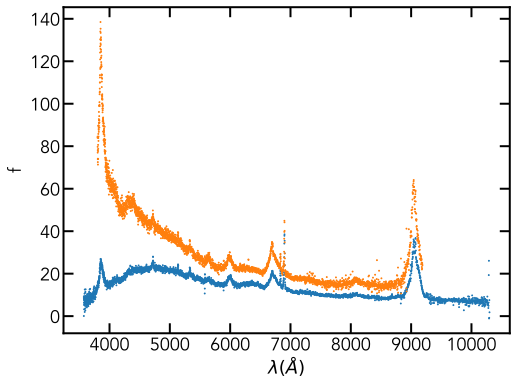

In [35]:
#fig = plt.figure(figsize=(4, 4))
#fig, ax = plt.subplots(figsize=(26.0,14.0))
fig, ax = plt.subplots(figsize=(8,6))

# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(SDSSJ110057_boss[SDSSJ110057_boss.columns[0]],
           SDSSJ110057_boss[SDSSJ110057_boss.columns[1]],s=1)


ax.scatter(SDSSJ110057_sdss_1[SDSSJ110057_sdss_1.columns[0]],
           SDSSJ110057_sdss_1[SDSSJ110057_sdss_1.columns[1]],s=1)


ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('f')

#ax.set_xlim(2400, 7700)
#ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

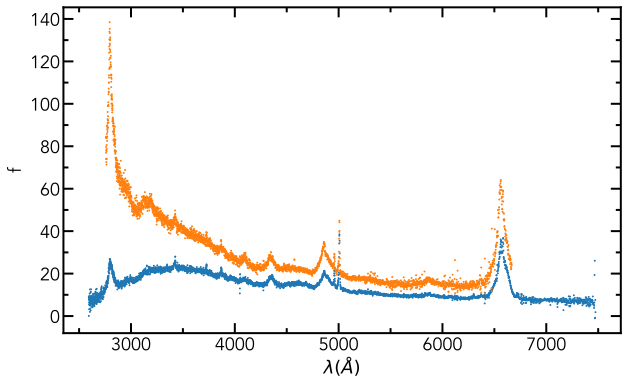

In [36]:
#fig = plt.figure(figsize=(4, 4))
#fig, ax = plt.subplots(figsize=(26.0,14.0))
fig, ax = plt.subplots(figsize=(10,6))

# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])


ax.scatter(SDSSJ110057_boss[SDSSJ110057_boss.columns[0]]/(1+SDSSJ110057_z),
           SDSSJ110057_boss[SDSSJ110057_boss.columns[1]],s=1)


ax.scatter(SDSSJ110057_sdss_1[SDSSJ110057_sdss_1.columns[0]]/(1+SDSSJ110057_z),
           SDSSJ110057_sdss_1[SDSSJ110057_sdss_1.columns[1]],s=1)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('f')

#ax.set_xlim(2400, 7700)
#ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
set_ax_locator(ax,1000,500,20,10)
plt.show()

In [4]:
'''
My, NPR's attempt... :-)
'''

## J110057   165.24045 -0.88458
## J231742   349.42751  0.09309
##
##  http://astroweb.case.edu/jakub/TA/Interpolation.html
##

import numpy as np
import scipy.interpolate as interp
import matplotlib
import matplotlib.pyplot as plt

from astroML.plotting import setup_text_plots
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

#Lets text in plots use latex
#setup_text_plots(usetex=True,fontsize=22)
plt.rcParams.update({'font.size': 14})
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"

#matplotlib.rc('font', size=18, family='serif',                  style='normal', variant='normal',                  stretch='normal', weight='heavy')

#Find a spectrum using astroquery
pos = coords.SkyCoord('165.24045d -0.88458d', frame='icrs')
xid = SDSS.query_region(pos, spectro=True,radius=2*u.arcsec)
print(xid)
j_eleven = SDSS.get_spectra(matches=xid)

pos = coords.SkyCoord('349.42751d  0.09309d', frame='icrs')
xxid = SDSS.query_region(pos, spectro=True,radius=2*u.arcsec)
print(xxid)
guo = SDSS.get_spectra(matches=xxid)



       ra               dec                objid        ...  run2d  instrument
---------------- ------------------ ------------------- ... ------- ----------
165.240449732377 -0.884579683912703 1237648720150528062 ... v5_10_0       BOSS
165.240449732377 -0.884579683912703 1237648720150528062 ...      26       SDSS


URLError: <urlopen error [Errno 0] Error>

In [12]:
#Create a plot using the two spectra
#loop over spectra and plot
fig, ax = plt.subplots(figsize=(26.0,14.0))

ax.set_xlim(2400, 7700)

for i in np.arange(xid['ra'].size):
    print(i)
    ax.plot((10.**j_eleven[i][1].data['loglam']/(1+0.379)),  j_eleven[i][1].data['flux']) #,label=xid['instrument'][i])
#  ax.plot((10.**j_eleven[i][1].data['loglam']/(1+0.379)), (j_eleven[i][1].data['flux'] * j_eleven[i][1].data['and_mask'])) #,label=xid['instrument'][i])

   
#for i in np.arange(xxid['ra'].size):
#    print(i)
#    ax.plot((10.**     guo[i][1].data['loglam']/(1+0.321)),     guo[i][1].data['flux']) #,label=xxid['instrument'][i])
ax.plot((10.**     guo[2][1].data['loglam']/(1+0.321)),     guo[2][1].data['flux'], linewidth=1.0) 
ax.plot((10.**     guo[1][1].data['loglam']/(1+0.321)),     guo[1][1].data['flux'], linewidth=1.2)
ax.plot((10.**     guo[0][1].data['loglam']/(1+0.321)),     guo[0][1].data['flux'], linewidth=1.4)
    
ax.grid(True, linestyle='-.')
#ax.tick_params(labelcolor='k', labelsize='medium', width=3)
#ax.set_xlabel(r'Wavelength [\AA] ')
#ax.set_ylabel(r'Flux [10$^{-17}$ ergs/cm$^2$/s/\AA]', weight='bold')

ax.set_xlabel(r'Rest Wavelength / $\AA$')
ax.set_ylabel(r'Flux [10$^{-17}$ ergs/cm$^2$/s/$\AA$]')
   
ax.legend(['J110057  MJD 51908',
           'J110057  MJD 55302',
           'J231742  MJD 51816',
           'J231742  MJD 52177',
           'J231742  MJD 52200'], 
        loc='upper right',
#        linewidth = [4,4,4,4,4], 
       shadow=True, fancybox=True, fontsize=32, frameon=True)

plt.savefig("J110057_vs_Guo_temp.png", format='png')
plt.show()



/Users/brettlv/anaconda3/lib/python3.8/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


       ra               dec                objid        ...  run2d  instrument
---------------- ------------------ ------------------- ... ------- ----------
165.240449732377 -0.884579683912703 1237648720150528062 ... v5_10_0       BOSS
165.240449732377 -0.884579683912703 1237648720150528062 ...      26       SDSS


HTTPError: HTTP Error 404: Not Found

In [40]:
3e8/1.4e9*100

21.428571428571427

In [42]:
3e8/2e8*100

150.0

In [44]:
3/1.4,3/0.2

(2.142857142857143, 15.0)

In [ ]:
200MHz 大概1.5cm